In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Lab/ML_eval/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
x = df.drop(['Price'],axis = 1)
y = df['Price']
cols = x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = cols
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


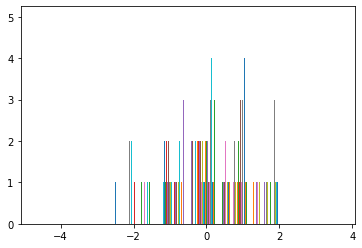

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(x)
plt.show()

In [ ]:
index = []
for i in range(6):
    index.append(1000*i)

for i in range(len(index)-1):
    print(len(x.loc[index[i]:index[i+1]-1]))
print(f"Index values : {index}")

for i in range(5):
    test_x = x.loc[index[i]:index[i+1]-1]
    test_y = y.loc[index[i]:index[i+1]-1]
    train_x = x.loc[0:index[i]-1]
    train_x = train_x.append(x.loc[index[i+1]:4999])
    train_y = y.loc[0:index[i]-1]
    train_y = train_y.append(y.loc[index[i+1]:4999])

1000
1000
1000
1000
1000
Index values : [0, 1000, 2000, 3000, 4000, 5000]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = 0.30)

In [ ]:
A = [0.001,0.01,0.1,1]

In [ ]:
import numpy as np

train_ones = []
test_ones = []

for i in range(x_train.shape[0]):
    train_ones.append([1])

for i in range(x_test.shape[0]):
    test_ones.append([1])
    

X_train = np.append(train_ones,x_train,axis=1)
X_test = np.append(test_ones,x_test,axis=1)

Y_train = y_train.values
Y_test = y_test.values

B = []
for i in range(len(A)):
    B.append([0,0,0,0,0,0])


In [ ]:
n = x_train.shape[0]
X = X_train
Y = Y_train
L = []

for p in range(X_train.shape[1]):
    L.append(X_train[:,p])
    
for p in range(len(A)):
    for k in range(1000):
        Q = np.matmul(X,B[p]) - Y
        temp = []
        for i in range(6):
            S = np.dot(L[i],Q)
            temp.append(B[p][i] - A[p]*S/n)
        B[p] = temp

In [ ]:
B

[[1067767.4411144704,
  205851.0570382412,
  139406.9304532366,
  101134.75911135129,
  15641.760821014837,
  133186.621871843],
 [1232993.4812200184,
  232547.03520982724,
  163053.40645172974,
  120833.95546028469,
  1977.2078236230723,
  152021.70941894362],
 [1232993.4586136744,
  232547.0778800007,
  163053.4328916139,
  120834.76900547005,
  1976.3651020263194,
  152021.64881710825],
 [1232993.4586136732,
  232547.0778800008,
  163053.432891614,
  120834.76900547015,
  1976.365102026247,
  152021.64881710813]]

In [ ]:
from sklearn.metrics import r2_score
r2 = []
for i in range(len(B)):
    predict_test = np.matmul(X_test,B[i])
    r2.append(r2_score(predict_test,Y_test))

In [ ]:
r2

In [ ]:
for i in range(len(r2)):
    if (r2[i]==max(r2)):
        optimalB = B[i]
optimalB

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ones = []
for j in range(x_test.shape[0]):
    ones.append([1])
x_test = np.append(ones,x_test,axis=1)
predicted = np.matmul(x_test,B)
r2_score(predicted,y_test)